In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

In [31]:
def load_and_preprocess_data():
    
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)

    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [32]:
def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [33]:
def train(model, x_train, y_train):
    
    history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    verbose=1)
    
    return history

In [34]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
model = create_model()

c:\Users\Abishek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
history = train(model,x_train,y_train)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8031 - loss: 0.6284 - val_accuracy: 0.9619 - val_loss: 0.1241
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9581 - loss: 0.1398 - val_accuracy: 0.9688 - val_loss: 0.0972
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9727 - loss: 0.0932 - val_accuracy: 0.9742 - val_loss: 0.0887
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9768 - loss: 0.0742 - val_accuracy: 0.9731 - val_loss: 0.0875
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9810 - loss: 0.0628 - val_accuracy: 0.9749 - val_loss: 0.0841
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9831 - loss: 0.0520 - val_accuracy: 0.9782 - val_loss: 0.0752
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9857 - loss: 0.0435 - val_accuracy: 0.9771 - val_loss: 0.0852
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accu

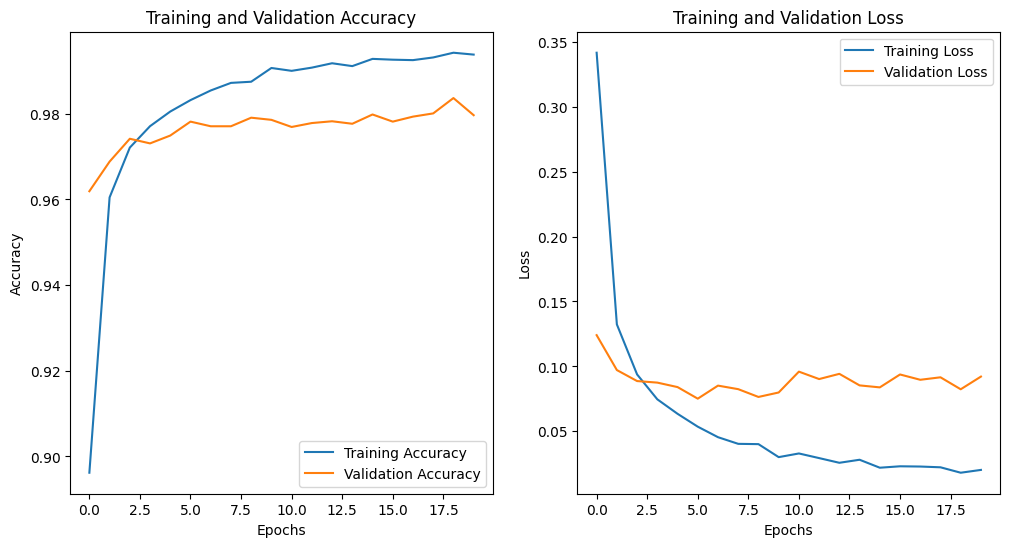

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
y_pred = model.predict(x_test)
y_true = tf.argmax(y_test,axis = 1).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


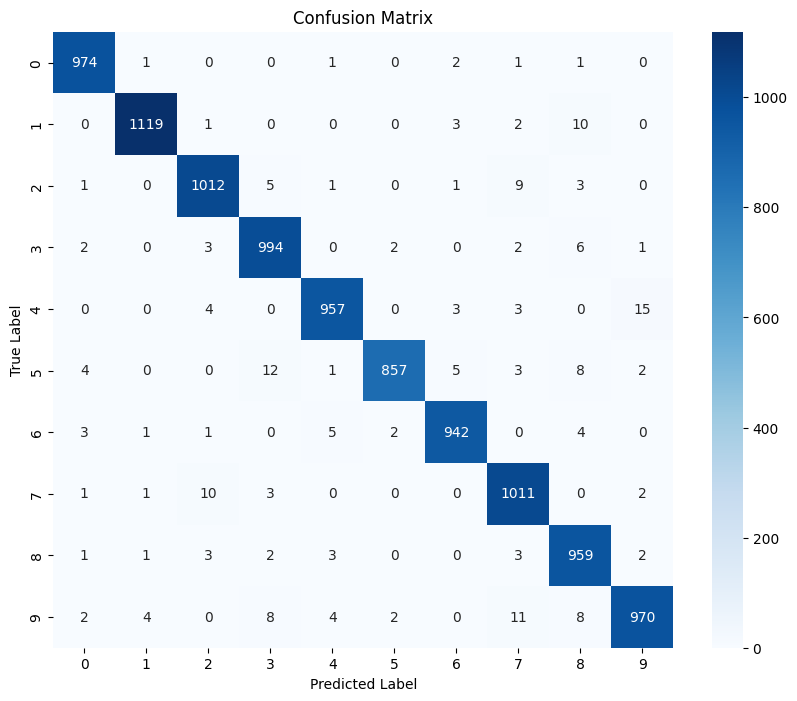

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [40]:
# Predict on the test dataset
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# True class labels
y_true = tf.argmax(y_test, axis=1).numpy()
conf_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy()
# Plot confusion matrix using Seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(class_report)